In [1]:
from CGL import CGL
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl
import pandas as pd
import cc3d

In [ ]:
!gdown 1FhFluUn5wbjPJ_NiPzpNuzorwNIctKSk
!gdown 1zDcWr9xuRIOfa0tYP6H1W9OnRh8OiVum
!gdown 1Xn-HV-yddobz7yVMQHTCQmAgOUPCpgi0
!gdown 1Mmjj2v_o734UHEnIemGYaOhqwKuPk31W
!gdown 1KY8_S15eC_0cZ3Adm9E2TSJyRugk-Hpc
!gdown 1FhFluUn5wbjPJ_NiPzpNuzorwNIctKSk
!gdown 1M5juLqIWsabuys3qmc5ekGelnrITDM-2
!gdown 1fHhnd8SkiGEck0Hj78uqkhjohnNA0QVg

### Loading 32x32x32

In [26]:
data = np.real(np.load("cgl3D.npy"))
times = np.load("cgl3DT.npy")
np.max(data[-1])

0.9757918832390431

### Loading 16x16x16

In [2]:
gl = CGL(c1=0.0, c2=1.5,msize=16,dim=3)
data,times = gl.solveRKF45(dt=0.03,ntimes=2500,stepsave=np.arange(4500))
np.save("Sim16.npy",data)
np.save("TSim16.npy",times)

100%|██████████████████████████████████████| 2500/2500 [00:15<00:00, 160.92it/s]


### Loading 20x20x20

In [18]:
np.max(data[-1])

(0.019752031060442883+0.9998056630347948j)

In [33]:
gl = CGL(c1=0.0, c2=1.5,msize=20,dim=3)
data,times = gl.solveRKF45(dt=0.03,ntimes=2500,stepsave=np.arange(4500))
np.save("Sim20.npy",data)
np.save("TSim20.npy",times)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2500/2500 [00:24<00:00, 101.64it/s]


In [34]:
np.min(data[-1]),np.max(data[-1])

((-0.955900649169757-0.024849400057909452j),
 (0.9727558278387647-0.06581710998346381j))

### Loading 24x24x24

In [25]:
gl = CGL(c1=0.0, c2=1.5,msize=24,dim=3)
data,times = gl.solveRKF45(dt=0.03,ntimes=2500,stepsave=np.arange(4500))
np.save("Sim24.npy",data)
np.save("TSim24.npy",times)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2500/2500 [00:43<00:00, 56.93it/s]


In [26]:
np.min(data[-1]),np.max(data[-1])

((-0.9954512904918924-0.028614854913039358j),
 (0.9730161224790638+0.001770803390052843j))

### Loading 28x28x28

In [27]:
gl = CGL(c1=0.0, c2=1.5,msize=28,dim=3)
data,times = gl.solveRKF45(dt=0.03,ntimes=2500,stepsave=np.arange(4500))
np.save("Sim28.npy",data)
np.save("TSim28.npy",times)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2500/2500 [01:07<00:00, 36.89it/s]


In [31]:
np.min(data[-1]),np.max(data[-1])

((-0.9519001617746633+0.04608142614123535j),
 (0.9753236554600974-0.03964451932186809j))

# Hypercube visualization

In [71]:
import numpy as np
import plotly.graph_objects as go

it = -1
vol = np.real(data[it])

l = vol.shape[0]

X, Y, Z = np.mgrid[:l, :l, :l]

title = "Iteration: "+str(it)+", Time: "+str(np.round(times[it],2))
fig = go.Figure(data=go.Volume(
    x=X.flatten(), y=Y.flatten(), z=Z.flatten(),
    value=vol.flatten(),
    isomin=0.8,
    isomax=1.0,
    opacity=0.1,
    surface_count=25,
    colorscale='Rainbow'
    ))
fig.update_layout(width=700, height=700,title = title)

fig.show()

## Making PSD

In [4]:
data =  np.real(np.load("Sim16.npy"))

el = []
ls = []
es = []
for vol in data:
    th = np.zeros(vol.shape)
    th[vol>0.8] = 1
    cc = cc3d.connected_components(th,connectivity=6)
    l = []
    e = []
    for i in range(1,np.max(cc)):
        x,y,z = np.where(cc==i)
        dx,dy,dz = (np.max(x)-np.min(x)+1)/vol.shape[0], (np.max(y)-np.min(y)+1)/vol.shape[1], (np.max(z)-np.min(z)+1)/vol.shape[2]
        l.append(np.max([dx,dy,dz]))
        e.append(np.sum(vol[x,y,z]**2))
        el.append({"l":np.max([dx,dy,dz]), "energy":np.sum(vol[x,y,z]**2)})
    if len(l)>0:
        largest = np.argmax(l)
        ls.append(l[largest])
        es.append(e[largest])
    else:
        ls.append(0.0)
        es.append(0.0)
el = pd.DataFrame(el)

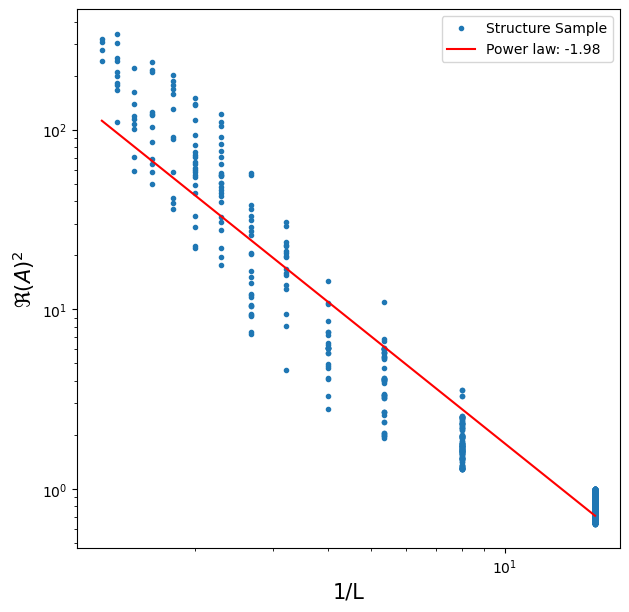

In [12]:
el =el[el["l"]<0.95]
el =el[el["l"]>0.05]

fit = np.polyfit(np.log(1/el["l"]),np.log(el["energy"]),deg = 1)
lx = np.linspace(np.min(np.log(1/el["l"])),np.max(np.log(1/el["l"])),1000)
ly = np.polyval(fit,lx)

plt.figure(figsize=(7,7))
plt.loglog(1/el["l"],el["energy"],ls='',marker='.',label="Structure Sample")
plt.loglog(np.exp(lx),np.exp(ly),color='r',label=f"Power law: {np.round(fit[0],2)}" )
plt.xlabel("1/L",fontsize=15)
plt.ylabel(r"$\Re{(A)}^2$",fontsize=15)
plt.legend()
plt.show()

# GPA 3D - 16^3

In [78]:
import GPA3D
from tqdm import tqdm

In [90]:
moments = []
ga = GPA3D.GPA3D(0.03)
data =  np.real(np.load("Sim16.npy"))
for i in tqdm(range(len(data))):
    hc = np.real(data[i]).astype(float)
    moments.append(ga(hc,moment=['G2','G3C']))
moments = pd.DataFrame(moments)

100%|███████████████████████████████████████| 2501/2501 [01:58<00:00, 21.15it/s]


In [93]:
np.savetxt("simulacao16x16x16.GPhase.txt",moments["G3C"].values, delimiter=' ', newline=' ')

/tmp/ipykernel_14702/24447190.py:42: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



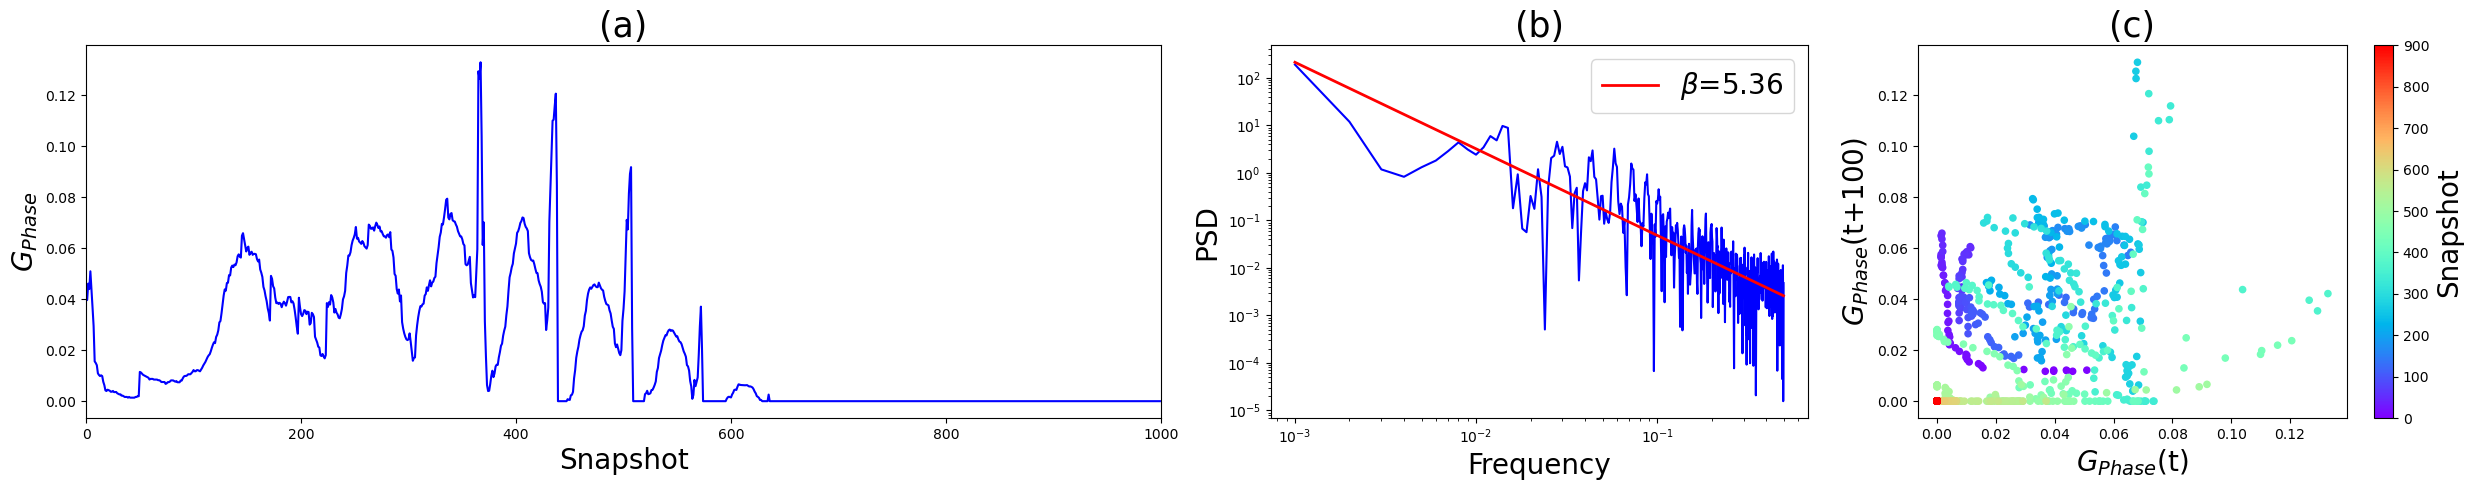

In [92]:
from matplotlib.gridspec import GridSpec as GridSpec
from scipy.signal import periodogram
import matplotlib.cm as cm

gs = GridSpec(1,3,width_ratios=(2,1,1))
plt.figure(figsize=(25,5))

plt.subplot(gs[0,0])
plt.title(r"(a)",fontsize=25)
plt.ylabel(r"$G_{Phase}$",fontsize=20)
plt.xlabel("Snapshot",fontsize=20)
plt.plot(np.arange(1000),moments["G3C"][:1000], color='b')
#plt.fill_between([44.5,45.5],-1,10, color='blue',alpha=0.3)
#plt.fill_between([39.5,40.5],-1,10, color='red',alpha=0.3)
#plt.fill_between([12.75,13.25],-1,10, color='green',alpha=0.3)
plt.xlim(0,1000)

plt.subplot(gs[0,1])
plt.title(r"(b)",fontsize=25)
g3=moments["G3C"][:1000]
ft = np.fft.fft(g3)
f = np.fft.fftfreq(len(g3))
ft,f = ft[f>0.0],f[f>0.0]
psd = np.real(ft*np.conj(ft))
plt.loglog(f,psd,color='b')
fit = np.polyfit(np.log(f),np.log(psd),deg=1)
res = np.polyval(fit, np.log(f))

plt.loglog(f,np.exp(res),color='r',label=r'$\beta$='+str(round(res[0],2)),lw=2)
plt.legend(fontsize=20)

plt.xlabel("Frequency",fontsize=20)
plt.ylabel("PSD",fontsize=20)

ax = plt.subplot(gs[0,2])
plt.title(r"(c)",fontsize=25)
step = 100
g3=moments["G3C"][:1000]
t = times[:1000-step]/times[1000-step]

plt.scatter(g3[:-step],g3[step:],color=cm.rainbow(t),s=20)
sm = plt.cm.ScalarMappable(cmap=plt.cm.get_cmap('rainbow'))
sm.set_clim(vmin=0, vmax=1000-step)
plt.colorbar(sm,ax=ax).set_label(label='Snapshot',size=20)
#plt.plot(g3[:-step],g3[step:],color='k')
plt.xlabel("$G_{Phase}$(t)",fontsize=20)
plt.ylabel("$G_{Phase}$(t+100)",fontsize=20)

plt.tight_layout()
plt.savefig("CGL3D_GPA_16x16x16.png",bbox_inches='tight',dpi=250)
plt.show()

# GPA 3D - 20^3

In [81]:
moments = []
ga = GPA3D.GPA3D(0.03)
data =  np.real(np.load("Sim20.npy"))
for i in tqdm(range(len(data))):
    hc = np.real(data[i]).astype(float)
    moments.append(ga(hc,moment=['G2','G3C']))
moments = pd.DataFrame(moments)

100%|███████████████████████████████████████| 2501/2501 [32:07<00:00,  1.30it/s]


In [86]:
np.savetxt("simulacao20x20x20.GPhase.txt",moments["G3C"].values, delimiter=' ', newline='')

/tmp/ipykernel_14702/762325953.py:43: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



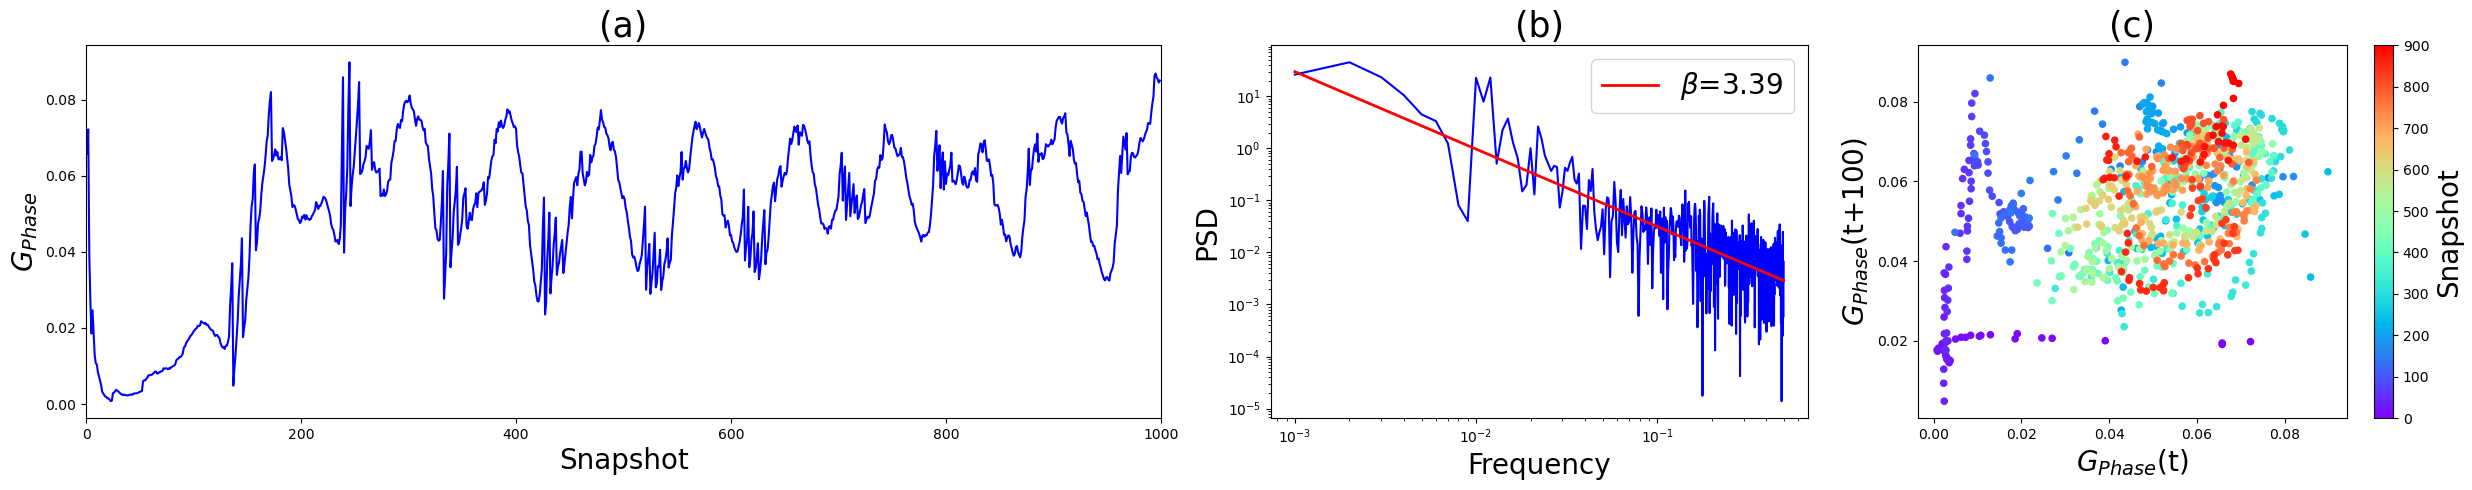

In [89]:
from matplotlib.gridspec import GridSpec as GridSpec
from scipy.signal import periodogram
import matplotlib.cm as cm

gs = GridSpec(1,3,width_ratios=(2,1,1))
plt.figure(figsize=(25,5))

plt.subplot(gs[0,0])
plt.title(r"(a)",fontsize=25)
plt.ylabel(r"$G_{Phase}$",fontsize=20)
plt.xlabel("Snapshot",fontsize=20)
plt.plot(np.arange(1000),moments["G3C"][:1000], color='b')
#plt.fill_between([44.5,45.5],-1,10, color='blue',alpha=0.3)
#plt.fill_between([39.5,40.5],-1,10, color='red',alpha=0.3)
#plt.fill_between([12.75,13.25],-1,10, color='green',alpha=0.3)
#plt.ylim(-0.01,0.04)
plt.xlim(0,1000)

plt.subplot(gs[0,1])
plt.title(r"(b)",fontsize=25)
g3=moments["G3C"][:1000]
ft = np.fft.fft(g3)
f = np.fft.fftfreq(len(g3))
ft,f = ft[f>0.0],f[f>0.0]
psd = np.real(ft*np.conj(ft))
plt.loglog(f,psd,color='b')
fit = np.polyfit(np.log(f),np.log(psd),deg=1)
res = np.polyval(fit, np.log(f))

plt.loglog(f,np.exp(res),color='r',label=r'$\beta$='+str(round(res[0],2)),lw=2)
plt.legend(fontsize=20)

plt.xlabel("Frequency",fontsize=20)
plt.ylabel("PSD",fontsize=20)

ax = plt.subplot(gs[0,2])
plt.title(r"(c)",fontsize=25)
step = 100
g3=moments["G3C"][:1000]
t = times[:1000-step]/times[1000-step]

plt.scatter(g3[:-step],g3[step:],color=cm.rainbow(t),s=20)
sm = plt.cm.ScalarMappable(cmap=plt.cm.get_cmap('rainbow'))
sm.set_clim(vmin=0, vmax=1000-step)
plt.colorbar(sm,ax=ax).set_label(label='Snapshot',size=20)
#plt.plot(g3[:-step],g3[step:],color='k')
plt.xlabel("$G_{Phase}$(t)",fontsize=20)
plt.ylabel("$G_{Phase}$(t+100)",fontsize=20)

plt.tight_layout()
plt.savefig("CGL3D_GPA_20x20x20.png",bbox_inches='tight',dpi=250)
plt.show()